In [988]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Cleaning the dataset

In [989]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Checking for any duplicate records

In [990]:
df.duplicated().any()

np.False_

### Converting the 'null' values in BMI to the median value

In [991]:
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']]).ravel()
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


### Converting the 'ever_married' column to int64 datatype where 1 represents 'yes' and 0 represents 'no'

In [992]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}).astype('int64')
df['ever_married'].info()
df.head(10)

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: ever_married
Non-Null Count  Dtype
--------------  -----
5110 non-null   int64
dtypes: int64(1)
memory usage: 40.1 KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,0,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,1,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,1,Private,Urban,58.57,24.2,Unknown,1


# Summary Statistics

In [993]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [994]:
df.describe()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.656164,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [995]:
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female' 'Other']
[1 0]
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [996]:
df.value_counts()

,,,,,,,,,,,,count
id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,
72940,Female,2.0,0,0,0,children,Urban,102.92,17.6,Unknown,0,1
67,Female,17.0,0,0,0,Private,Urban,92.97,28.1,formerly smoked,0,1
77,Female,13.0,0,0,0,children,Rural,85.81,18.6,Unknown,0,1
84,Male,55.0,0,0,1,Private,Urban,89.17,31.5,never smoked,0,1
91,Female,42.0,0,0,0,Private,Urban,98.53,18.5,never smoked,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
170,Male,43.0,0,0,1,Govt_job,Rural,80.07,28.1,never smoked,0,1
163,Female,20.0,0,0,0,Private,Rural,94.67,28.8,Unknown,0,1
156,Female,33.0,0,0,1,Private,Rural,86.97,42.2,never smoked,0,1


## Summary Statistics - avg_glucose_level

In [997]:
avg_glucose_level = df["avg_glucose_level"]

Q1 = avg_glucose_level.quantile(0.25)
Q3 = avg_glucose_level.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(np.float64(77.245), np.float64(114.09), np.float64(36.845))

In [998]:
lower_glucose_level = Q1 - 1.5*IQR
upper_glucose_level = Q3 + 1.5*IQR
lower_glucose_level, upper_glucose_level

(np.float64(21.977500000000006), np.float64(169.35750000000002))

In [999]:
df_outliers = df[(avg_glucose_level < lower_glucose_level) | (avg_glucose_level > upper_glucose_level)]
df_no_outliers = df[(avg_glucose_level >= lower_glucose_level) & (avg_glucose_level <= upper_glucose_level)]
df_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,1,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,1,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,1,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,1,Self-employed,Rural,193.88,24.3,Unknown,0


In [1000]:
df = df_no_outliers

## Summary Statistics - bmi

In [1001]:
bmi = df["bmi"]
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(np.float64(23.3), np.float64(32.2), np.float64(8.900000000000002))

In [1002]:
lower_bmi = Q1 - 1.5*IQR
upper_bmi = Q3 + 1.5*IQR
lower_bmi, upper_bmi

(np.float64(9.949999999999998), np.float64(45.550000000000004))

In [1003]:
df_outliers = df[(bmi < lower_bmi) | (bmi > upper_bmi)]
df_no_outliers = df[(bmi >= lower_bmi) & (bmi <= upper_bmi)]
df_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
79,42117,Male,43.0,0,0,1,Self-employed,Urban,143.43,45.9,Unknown,1
270,72911,Female,57.0,1,0,1,Private,Rural,129.54,60.9,smokes,0
333,1703,Female,52.0,0,0,1,Private,Urban,82.24,54.7,formerly smoked,0
341,38805,Female,37.0,0,0,1,Private,Rural,75.18,48.2,formerly smoked,0
358,66333,Male,52.0,0,0,1,Self-employed,Urban,78.40,64.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,1,Private,Urban,70.51,54.1,never smoked,0
4976,63656,Female,18.0,0,0,0,Private,Urban,101.95,46.0,formerly smoked,0
5009,40732,Female,50.0,0,0,1,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,38349,Female,49.0,0,0,1,Govt_job,Urban,69.92,47.6,never smoked,0


In [1004]:
df = df_no_outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4383 non-null   int64  
 1   gender             4383 non-null   object 
 2   age                4383 non-null   float64
 3   hypertension       4383 non-null   int64  
 4   heart_disease      4383 non-null   int64  
 5   ever_married       4383 non-null   int64  
 6   work_type          4383 non-null   object 
 7   Residence_type     4383 non-null   object 
 8   avg_glucose_level  4383 non-null   float64
 9   bmi                4383 non-null   float64
 10  smoking_status     4383 non-null   object 
 11  stroke             4383 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 445.1+ KB


### Standardizing categorical values

In [1019]:
df['smoking_status'] = df['smoking_status'].replace({'formerly_smoked': 'formerly smoked'})
df['work_type'] = df['work_type'].replace({'govt job': 'Govt_job'})
df['gender'] = df['gender'].replace({'female': 'Female', 'm': 'Male'})

print(df['smoking_status'].unique())
print(df['work_type'].unique())
print(df['gender'].unique())

['never smoked' 'Unknown' 'smokes' 'formerly smoked']
['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']
['Male' 'Female' 'Other']


### Encoding categorical values

In [1006]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

print(encoded_data.head())

   gender_Male  gender_Other  work_type_Never_worked  work_type_Private  \
0          1.0           0.0                     0.0                1.0   
1          1.0           0.0                     0.0                1.0   
2          0.0           0.0                     0.0                1.0   
3          0.0           0.0                     0.0                1.0   
4          0.0           0.0                     0.0                1.0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                      0.0                 0.0                   0.0   
1                      0.0                 0.0                   0.0   
2                      0.0                 0.0                   1.0   
3                      0.0                 0.0                   0.0   
4                      0.0                 0.0                   1.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             0.0                 

### Feature Scaling

In [1007]:
df = df.drop(columns=['id'])
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['stroke']).columns
scaler = MinMaxScaler()

scaled_data = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

print(scaled_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.975586           0.0            1.0           1.0           0.447341   
1  0.902344           1.0            1.0           1.0           0.131825   
2  0.841309           0.0            0.0           0.0           0.345808   
3  0.719238           0.0            0.0           1.0           0.185188   
4  0.951172           0.0            0.0           1.0           0.030380   

        bmi  
0  0.630682  
1  0.485795  
2  0.355114  
3  0.505682  
4  0.394886  


In [1008]:
processed_data = pd.concat([scaled_data, encoded_data], axis=1)
print(processed_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.975586           0.0            1.0           1.0           0.447341   
1  0.902344           1.0            1.0           1.0           0.131825   
2  0.841309           0.0            0.0           0.0           0.345808   
3  0.719238           0.0            0.0           1.0           0.185188   
4  0.951172           0.0            0.0           1.0           0.030380   

        bmi  gender_Male  gender_Other  work_type_Never_worked  \
0  0.630682          1.0           0.0                     0.0   
1  0.485795          1.0           0.0                     0.0   
2  0.355114          0.0           0.0                     0.0   
3  0.505682          0.0           0.0                     0.0   
4  0.394886          0.0           0.0                     0.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                1.0                      0.0                 0.0   
1 

### Applying 95% PCA

In [1009]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(scaled_data)

print(f"Original number of features: {processed_data.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 16
Reduced number of features after PCA: 6


In [1010]:
components_df = pd.DataFrame(pca.components_, columns=numerical_cols)

top_features_per_pc = components_df.abs().idxmax(axis=1)

print("Most important original features for each principal component:")
print(top_features_per_pc.unique())

Most important original features for each principal component:
['ever_married' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi']


### Bar chart demonstrating the variance contribution of the top features of the database with respect to each principal component found in the PCA

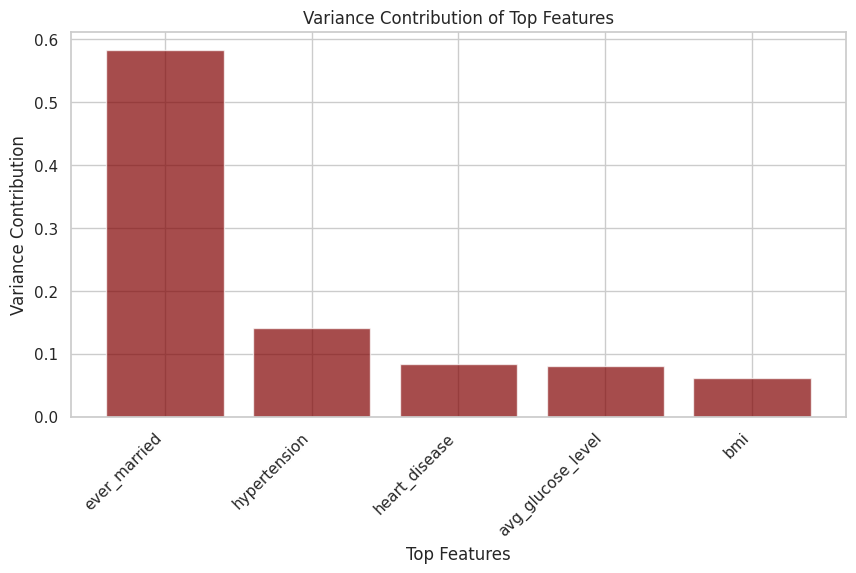

In [1011]:
top_features = top_features_per_pc.unique()
top_feature_variances = [pca.explained_variance_ratio_[i] for i in range(len(top_features))]


plt.figure(figsize=(10, 5))
plt.bar(top_features, top_feature_variances, alpha=0.7, align='center', color='maroon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Features')
plt.ylabel('Variance Contribution')
plt.title('Variance Contribution of Top Features')
plt.show()

### Saving the cleaned dataset to a csv file

In [1012]:
df.to_csv("Cleaned-healthcare-dataset-stroke-data.csv", index=False)

# Basic Data Visualization

### Plot of glucose_level distribution


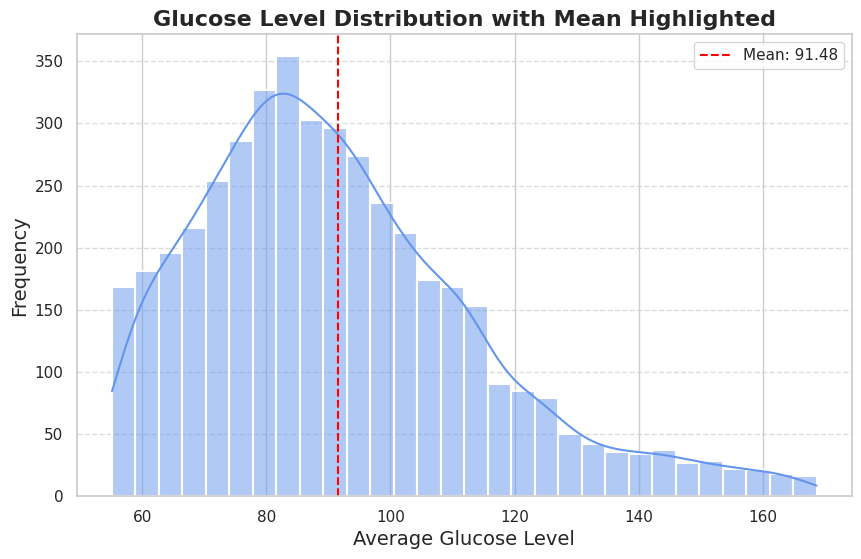

In [1013]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_glucose_level'], kde=True, color='cornflowerblue', bins=30, linewidth=1.5)

mean_glucose = df['avg_glucose_level'].mean()

plt.axvline(mean_glucose, color='red', linestyle='--', label=f'Mean: {mean_glucose:.2f}')
plt.title("Glucose Level Distribution with Mean Highlighted", fontsize=16, fontweight='bold')
plt.xlabel("Average Glucose Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Box and Whisker plot of BMI in relation to Stroke

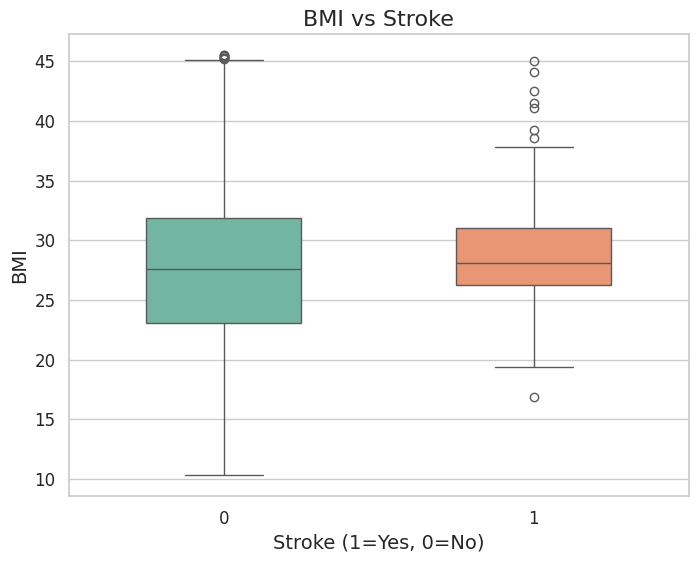

In [1014]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='stroke', y='bmi', hue='stroke', palette='Set2', width=0.5, legend=False)

plt.title("BMI vs Stroke", fontsize=16)
plt.xlabel("Stroke (1=Yes, 0=No)", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### HeatMap demonstrating the correlation between the numerical columns within the dataset

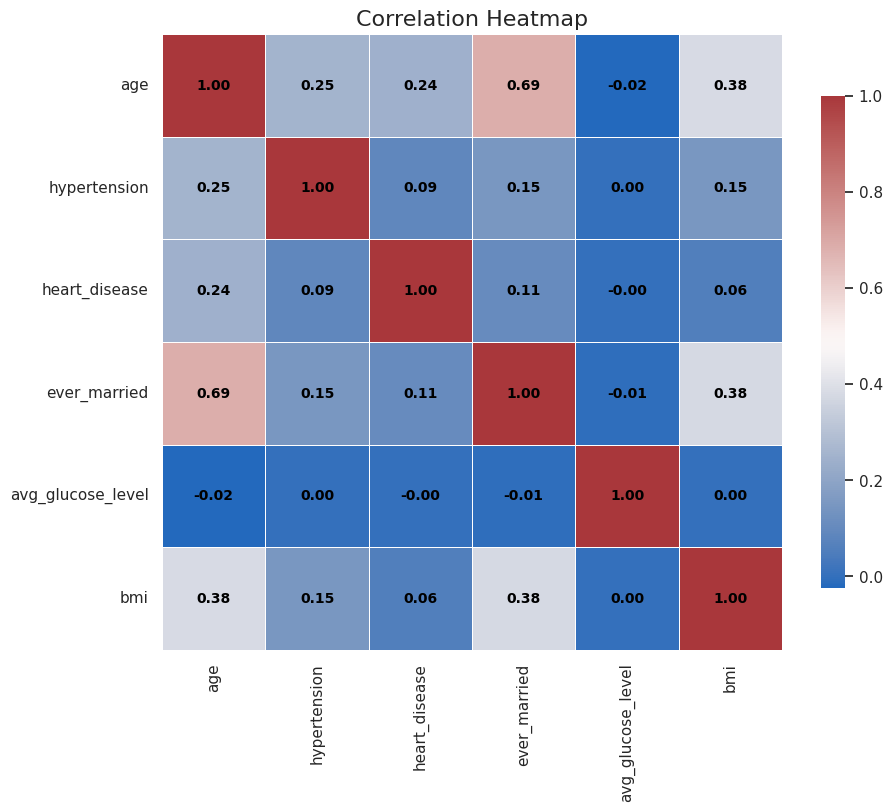

In [1015]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt='.2f',
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='white',
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Kernel Density Estimate (KDE) distibution of age in relation to Stroke

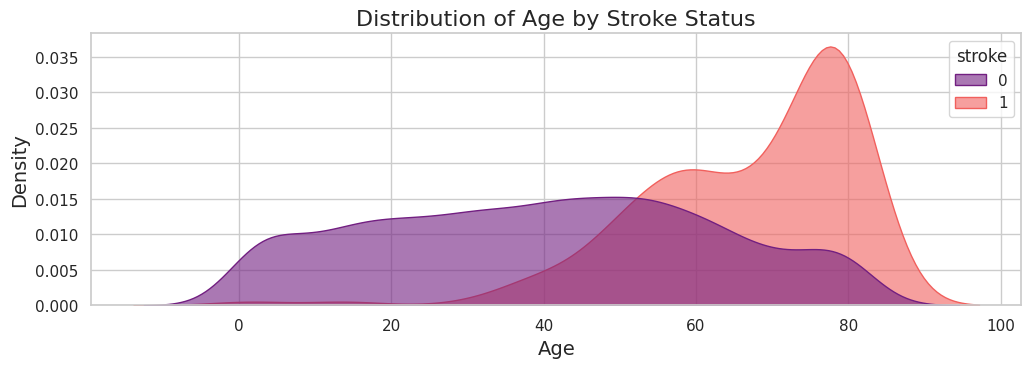

In [1016]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='magma')
plt.title("Distribution of Age by Stroke Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate (KDE) distibution of BMI in relation to Stroke

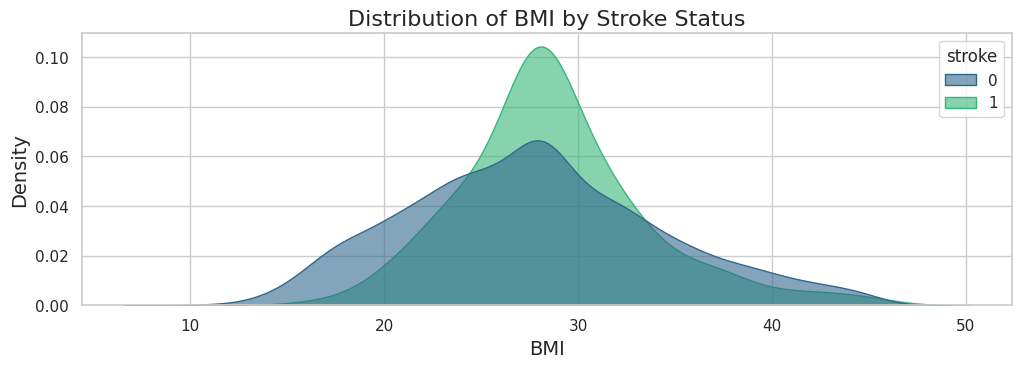

In [1017]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='viridis')
plt.title("Distribution of BMI by Stroke Status", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate (KDE) distibution of avg_glucose_level in relation to Stroke

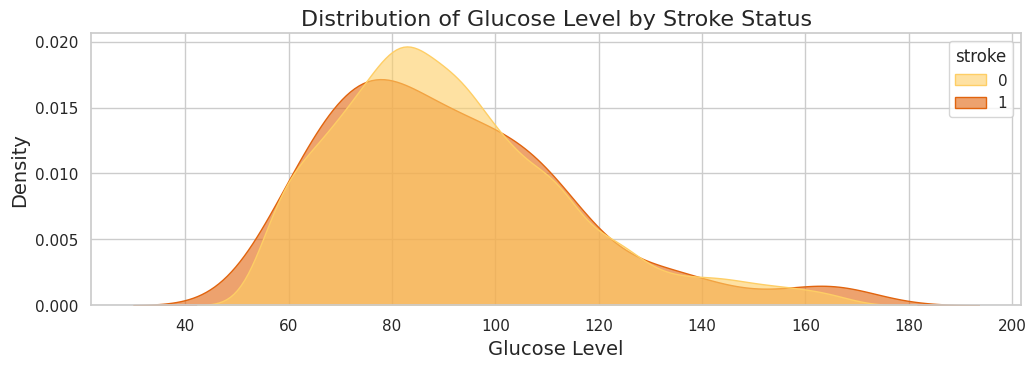

In [1018]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='YlOrBr')
plt.title("Distribution of Glucose Level by Stroke Status", fontsize=16)
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()